In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, zscore, skew, kurtosis, entropy
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [33]:

# Function to download XAU/USD data
def get_xauusd_data(): 
    ticker = "GC=F"  # XAU/USD exchange rate
    data = yf.download(ticker, start="2010-01-01", end="2025-02-01")  # Download data from Yahoo Finance
    data = data[['Close']]  # Use the 'Close' price for prediction
    df = pd.DataFrame(data)
    data_csv = df.to_csv('xau_usd.csv')
    return data


In [34]:

# Load XAU/USD data
data = get_xauusd_data()

# Check for missing values
def check_missing_values(data):
    missing_data = data.isnull().sum()
    missing_percentage = (missing_data / len(data)) * 100
    return missing_data, missing_percentage

missing_data, missing_percentage = check_missing_values(data)


[*********************100%***********************]  1 of 1 completed


In [35]:

# Check for duplicates
def check_duplicates(data):
    duplicates = data.duplicated().sum()
    return duplicates

duplicates = check_duplicates(data)
duplicates

753

In [36]:

# Calculate coefficient of variation (CV)
def calculate_cv(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    cv = (std_dev / mean) * 100
    return cv

cv = calculate_cv(data['Close'])
cv


c:\Users\lostinhaze\anaconda3\envs\eda\Lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Ticker
GC=F    23.299637
dtype: float64

In [37]:

# Perform Augmented Dickey-Fuller test for stationarity
def check_stationarity(data):
    adf_test = adfuller(data['Close'])
    return adf_test[0], adf_test[1], adf_test[4]

adf_stat, adf_pvalue, adf_critical_values = check_stationarity(data)
print('ADF Statistic:', adf_stat)
print('p-value:', adf_pvalue)
print('Critical Values:', adf_critical_values)


ADF Statistic: 0.6787346106743745
p-value: 0.9894037863478067
Critical Values: {'1%': -3.4320761232873904, '5%': -2.862302706315417, '10%': -2.5671759986719715}


In [38]:

# Check for outliers using Z-score (threshold > 3)
def check_outliers(data):
    z_scores = zscore(data)
    outliers = np.where(np.abs(z_scores) > 3)
    return len(outliers[0])

outliers = check_outliers(data['Close'])
outliers


68

In [39]:

# ANOVA test to compare means (for this example, split into two groups: before and after 2018)
def anova_test(data):
    data_before_2018 = data[data.index < '2018-01-01']
    data_after_2018 = data[data.index >= '2018-01-01']
    f_stat, p_value = f_oneway(data_before_2018['Close'], data_after_2018['Close'])
    return f_stat, p_value

f_stat, p_value = anova_test(data)
print('F-statistic:', f_stat)
print('p-value:', p_value)

F-statistic: [2024.85882558]
p-value: [0.]


In [40]:

# Correlation Matrix for Feature Collinearity
def correlation_matrix(data):
    corr_matrix = data.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()


In [41]:

# Multicollinearity using VIF
def calculate_vif(data):
    data_with_const = add_constant(data)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(data_with_const.values, i) for i in range(data_with_const.shape[1])]
    return vif_data


In [42]:

# Skewness and Kurtosis check
def check_skewness_kurtosis(data):
    skewness = skew(data)
    kurt = kurtosis(data)
    return skewness, kurt


In [43]:

# Population Stability Index (PSI)
def population_stability_index(data, bins=10):
    data_binned = pd.cut(data, bins=bins)
    observed_dist = data_binned.value_counts() / len(data)
    expected_dist = np.ones_like(observed_dist) / len(observed_dist)  # assuming uniform distribution for expected
    psi = np.sum((observed_dist - expected_dist) * np.log(observed_dist / expected_dist))
    return psi


In [44]:

# Autocorrelation & Partial Autocorrelation
def plot_autocorrelation(data):
    plt.figure(figsize=(12, 6))
    plot_acf(data, lags=50)
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plot_pacf(data, lags=50)
    plt.show()


In [45]:

# Bootstrapping Example
def bootstrap_resample(data, num_resamples=1000):
    resampled_means = []
    for _ in range(num_resamples):
        resample = data.sample(n=len(data), replace=True)
        resampled_means.append(resample.mean())
    return np.mean(resampled_means), np.std(resampled_means)


In [46]:

# Entropy calculation
def calculate_entropy(data):
    prob_dist = data.value_counts(normalize=True)
    return entropy(prob_dist)


In [47]:

# Show results
print("Missing Data:\n", missing_data)
print("\nMissing Data Percentage:\n", missing_percentage)
print("\nDuplicates:", duplicates)
print("\nCoefficient of Variation (CV):", cv)
print("\nADF Test Statistic:", adf_stat)
print("ADF Test P-Value:", adf_pvalue)
print("ADF Critical Values:", adf_critical_values)
print("\nNumber of Outliers:", outliers)
print("\nANOVA Test (F-statistic, p-value):", f_stat, p_value)


Missing Data:
 Price  Ticker
Close  GC=F      0
dtype: int64

Missing Data Percentage:
 Price  Ticker
Close  GC=F      0.0
dtype: float64

Duplicates: 753

Coefficient of Variation (CV): Ticker
GC=F    23.299637
dtype: float64

ADF Test Statistic: 0.6787346106743745
ADF Test P-Value: 0.9894037863478067
ADF Critical Values: {'1%': -3.4320761232873904, '5%': -2.862302706315417, '10%': -2.5671759986719715}

Number of Outliers: 68

ANOVA Test (F-statistic, p-value): [2024.85882558] [0.]


In [48]:

# VIF Calculation (assuming you have multiple features to check)
vif_data = calculate_vif(data[['Close']])  # In this case, only 'Close' is used
print("\nVariance Inflation Factor (VIF):\n", vif_data)



Variance Inflation Factor (VIF):
          Feature        VIF
0          const  19.420512
1  (Close, GC=F)   1.000000


In [49]:

# Skewness and Kurtosis
skewness, kurt = check_skewness_kurtosis(data['Close'])
print("\nSkewness:", skewness)
print("Kurtosis:", kurt)



Skewness: [1.05061595]
Kurtosis: [0.88423113]


In [51]:

# Bootstrapping
mean, std_dev = bootstrap_resample(data['Close'])
print("Bootstrapped Mean:", mean)
print("Bootstrapped Standard Deviation:", std_dev)


Bootstrapped Mean: 1551.5128961372166
Bootstrapped Standard Deviation: 5.690517108633972


In [52]:

# Entropy
entropy_value = calculate_entropy(data['Close'])
print("Entropy:", entropy_value)


Entropy: 7.943536346609122


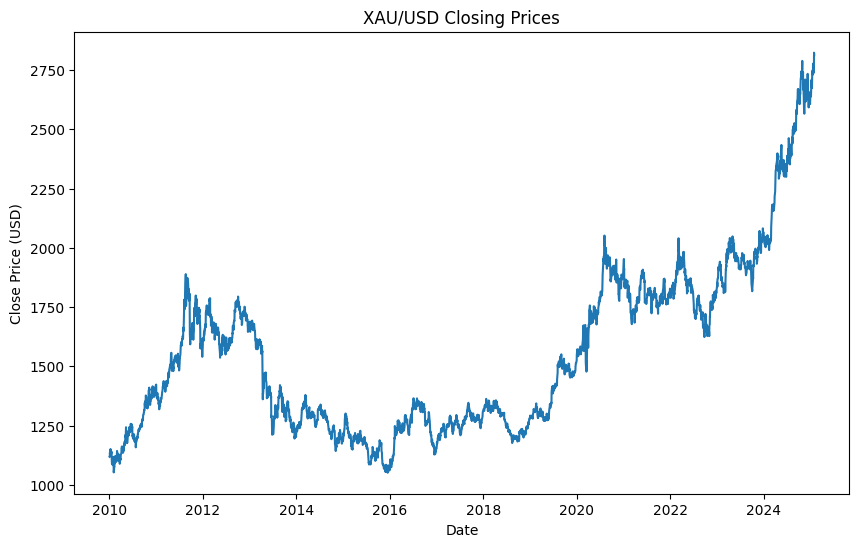

<Figure size 1200x600 with 0 Axes>

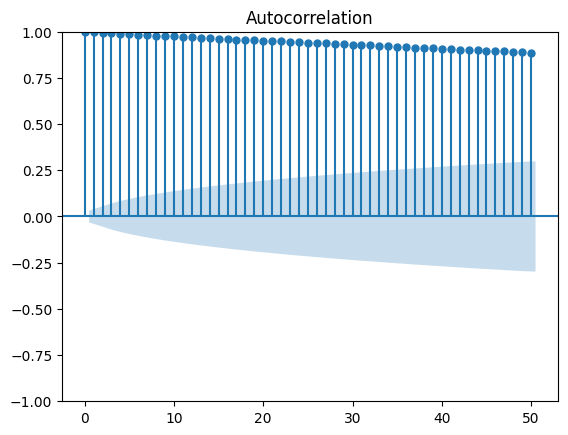

<Figure size 1200x600 with 0 Axes>

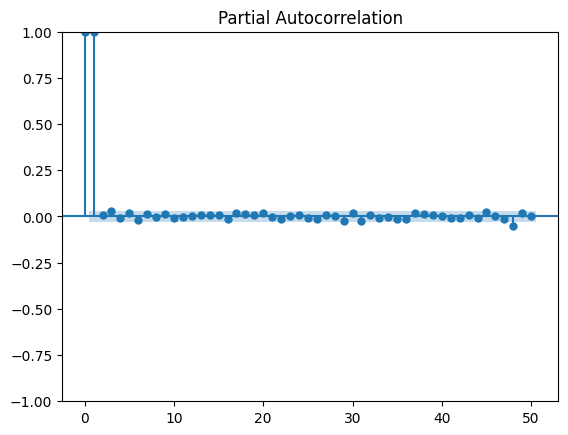

In [53]:

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.title("XAU/USD Closing Prices")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.show()

# Plot Autocorrelation and Partial Autocorrelation
plot_autocorrelation(data['Close'])
